
	-------------------------
	|     CFB BREAKDOWN     |
	-------------------------

Please input a name of a team to analyze: duke

Available columns to choose from for dependent variable:
	CMP - Completed passes in a season
	ATT - Pass attempts in a season
	YDS - Passing yards gained in a season
	CMPPercent - Percentage of passes completed in a season
	YPA - Yards per passing attempt in a season
	LNG - Most yards from a pass play in a season
	TD - Passing touchdowns in a season
	INT - Interceptions thrown in a season
	SACK - Times teams was sacked in a season
	SYL - Yards lost from sacks in a season
	RTG - Combination of QB ratings in a season
	R_ATT - Rush play attemps in a season
	R_AVG - Average yards on rush plays in a season
	TOTAL_PLAYS - Total offensive plays in a season
	RUN_PERCENT - Percentage of plays that were rush plays in a season
	PASS_PERCENT - Percentage of plays that were pass plays in a season

Please input an above column (exactly as displayed from the list above) t

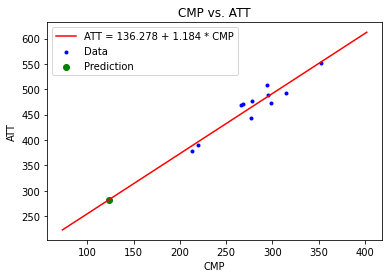


	--------------------------------------------------

Would you like to analyze another team (Y/N)? N

	--------------------------------------------------

Thank you for using...

	-------------------------
	|     CFB BREAKDOWN     |
	-------------------------



In [ ]:
.'''
INFS 394 - CFB Breakdown

----------

Group members:
    - Brian Nguyen
    - Charlie O'Gorman
    - Jackson Kohlenberger
    - Niklaas Landhuis

----------

This Python program prompts the user to select a team to perform designed statistic analysis. 
Using loops, we ask the user to select a independent and dependent variable from the available columns.
The user also input a value to predict the data.
The program then shows the linear regression model, correlation matrix and  
a scatter linear regression graph based off the user inputs. 
Finally, we ask if the user wants to breakdown another team.

----------

Dataset: https://www.kaggle.com/braydenrogowski/college-football-offensive-stats-20102020 
'''

# Import applicable modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

# Command Prompt/Terminal installation command
# pip3.7 install numpy pandas matplotlib scipy

##########   Dataset Pre-processing   ##########

# Create DataFrame 'data_df' from 'College-Football-Original-Dataset - Raw_Data (1).csv'
# NOTE: File must be reuploaded to Google Colab session storage every 12 hours, as the
# session storage resets to allow for storage usage on Google's end
data_df = pd.read_csv('College-Football-Original-Dataset - Raw_Data (1).csv', header = 1)

# Remove rows with NaN values
data_df = data_df.dropna()

# Convert 'UniversityName' column to lowercase
data_df['UniversityName'] = data_df['UniversityName'].str.lower()

# Convert 'TeamID' column to lowercase
data_df['TeamID'] = data_df['TeamID'].str.lower()

# Remove '%' symbol from 'RUN_PERCENT' column's values and cast column as float
data_df['RUN_PERCENT'] = data_df['RUN_PERCENT'].str.replace('[%]', '').astype('float')

# Remove '%' symbol from 'PASS_PERCENT' column's values and cast column as float
data_df['PASS_PERCENT'] = data_df['PASS_PERCENT'].str.replace('[%]', '').astype('float')

# Remove ',' symbol from 'YDS' column's values and cast column as int
data_df['YDS'] = data_df['YDS'].str.replace('[,]', '').astype('int')

##########   User Input Handling   ##########

# Print program header
header = '|     CFB BREAKDOWN     |'
print('\n\t' + ('-' * len(header)))
print('\t' + header)
print('\t' + ('-' * len(header)))

# Create and set 'restart' loop key to True
restart = True

# WHile 'restart' is True...
while restart:

    # Print blank line
    print()

    # Create outer infinite loop
    while True:

        # Attempt to...
        try:

            # Prompt user input for team name
            team_usr = str(input('Please input a name of a team to analyze: '))

            # Reformat 'team_usr' by removing whitespaces and converting to lowercase
            team_usr = team_usr.replace(' ', '').lower()

            # If 'team_usr' does not exists in 'data_df'...
            if (team_usr not in data_df['UniversityName'].values):

                # Print error message
                print('ERROR: Indicated team does not exist in our data. Please input a different team name.')
                
                # Repeat outer loop
                continue

        # If invalid input...
        except TypeError:

            # Print error message
            print('ERROR: Please input a String.')

            # Repeat outer loop
            continue

        # Print blank line
        print()

        ##########   Analysis Start   ##########

        # Query for available seasons of 'team_usr' in 'data_df'
        team_seasons = data_df.query('UniversityName == \'' + team_usr + '\'')

        # Create variable 'columns' to list column data
        columns = team_seasons.columns.tolist()
        columns = columns[3:]

        # Create list of descriptors corresponding to each column
        descriptions = [
            'Completed passes in a season',
            'Pass attempts in a season',
            'Passing yards gained in a season',
            'Percentage of passes completed in a season',
            'Yards per passing attempt in a season',
            'Most yards from a pass play in a season',
            'Passing touchdowns in a season',
            'Interceptions thrown in a season',
            'Times teams was sacked in a season',
            'Yards lost from sacks in a season',
            'Combination of QB ratings in a season',
            'Rush play attemps in a season',
            'Average yards on rush plays in a season',
            'Total offensive plays in a season',
            'Percentage of plays that were rush plays in a season',
            'Percentage of plays that were pass plays in a season'
        ]

        # Print column list to chose from
        print('Available columns to choose from for dependent variable:')
        for index, col in enumerate(columns):
            print('\t' + col + ' - ' + descriptions[index])
       
        # Print blank line
        print()

        # Creates while loop for Y_var
        while True:

          # Attempt to...
            try:
         
                # Prompt user to enter colum from list
                y_var = str(input('Please input an above column (exactly as displayed from the list above) to predict upon: '))

                # If input not in columns...
                if y_var not in columns: 

                    # Print error msg
                    print('ERROR: Please input a column from the list above exactly as displayed.')

                    # Repeat Y_Var loop         
                    continue
          
                # If no error remove user inputed column and description
                else:
                    descriptions.pop(columns.index(y_var))
                    columns.remove(y_var)

            # If invalid input...
            except TypeError:

                # Print error message
                print('ERROR: Please input a String.')

                # Repeat Y_var loop
                continue

            # Break from Y_var loop
            break

        # Print blank line
        print()

        # Print new column list with 
        print('Available columns to choose from for independent variable:')
        for index, col in enumerate(columns):
            print('\t' + col + ' - ' + descriptions[index])

        # Prints blank statement
        print()

        # Creates a while loop for x_var
        while True:
           
            # Attempt to... 
            try:
             
                # Promt user to enter column from list
                x_var = str(input('Please input an above column (exactly as displayed from the list above) to predict based upon: '))

                # If input not in columns...  
                if x_var not in columns: 
         
                    # Print error msg 
                    print('ERROR: Please input a column from the list above exactly as displayed.')
        
                    # Repeat x_var loop
                    continue
        
                # If not error remove user inputed column and description
                else:
                    descriptions.pop(columns.index(x_var))
                    columns.remove(x_var)
       
            # If invalid input...
            except TypeError:

                # Print error message
                print('ERROR: Please input a String.')

                # Repeat x_var loop 
                continue

            # Break form x_var loop
            break

        # Print blank line
        print()

        # Creates while loop for x_user
        while True:
        
            # Attempts to...
            try:
                x_usr = float(input('Please input a value of ' + x_var + ' to predict based upon: '))

            # If invalid input...
            except ValueError:

                # Print error message
                print('ERROR: Please input a float value.')

                # Repeat x_user loop
                continue

            # Break from x_user loop
            break

        # Print divider line
        print('\n\t' + ('-' * 50) + '\n')

        # Create data frame for x_var
        x_var_df = team_seasons[x_var]

        # Create data frame for y_var
        y_var_df = team_seasons[y_var]

        # Create linear regression model using 'x_var_df' and 'y_var_df' as inputs
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_var_df, y_var_df)

        # Creates variable for predictor
        y_pred = intercept + slope * x_usr

        # Prints predicted formula
        print(f'Given {x_var} = {x_usr}, the predicted {y_var} would be: {y_pred}')

        # Print blank line
        print()

        # Print corralation matrix
        print(f'Correlation matrix for {x_var} by {y_var}:')
        print(data_df[[x_var, y_var]].corr())

        # Print blank line
        print()

        # Print linear regression model
        print('Linear regression model created: ')
        linreg_equation_string = f'{y_var} = {round(intercept, 3)} + {round(slope, 3)} * {x_var}'
        print('\t' + linreg_equation_string)

        # Print blank line
        print()

        # Create plot figure 'fig'
        fig = plt.figure()

        # Add subplot 'ax' to 'fig'
        ax = fig.add_subplot(1, 1, 1)

        # If 'x_usr' < min value in 'x_var_df'...
        if x_usr < min(x_var_df):

            # Set 'min_val' to 'x_usr'
            min_val = x_usr

        # Otherwise...
        else:

            # Set 'min_val' to min value in 'x_var_df'
            min_val = min(x_var_df)

        # If 'x_usr' < max value in 'x_var_df'...
        if x_usr > max(x_var_df):

            # Set 'max_val' to 'x_usr'
           max_val = x_usr

        # Otherwise...
        else:

            # Set 'min_val' to max value in 'x_var_df'
            max_val = max(x_var_df)

        # Create x values of linear regression line plot
        linreg_x = np.linspace(min_val - 50, max_val + 50, 25)

        # Calculate corresponding y values of linear regression line plot
        linreg_y = intercept + slope * linreg_x

        # Plot linear regression line
        ax.plot(linreg_x, linreg_y, c = 'red', label = linreg_equation_string)

        # Plot data points
        ax.scatter(x_var_df, y_var_df, c = 'blue', marker = '.', label = 'Data')

        # Plot prediction point
        ax.scatter(x_usr, y_pred, c = 'green', marker = 'o', label = 'Prediction')

        # Format plot metadata
        title_string = x_var + ' vs. ' + y_var
        plt.title(title_string)
        plt.legend(loc = 'upper left')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)
      
        # Display plot
        plt.show()

        ##########   Analysis End   ##########

        # Print divider line
        print('\n\t' + ('-' * 50) + '\n')

        # Break from outer infinite loop
        break

    # Create restart infinite loop
    while True: 

        # Attempt to...
        try:

            # Prompt user if they would like to restart the program
            restart_usr = str(input('Would you like to analyze another team (Y/N)? '))

            # Reformat 'restart_usr' by converting to uppercase
            restart_usr = restart_usr.upper()

            # If user does want to restart...
            if (restart_usr == 'Y'):

                # Break from restart infinite loop
                break

            # If user does not want to restart...
            elif (restart_usr == 'N'):

                # Set 'restart' loop key to False
                restart = False

                # Break from restart infinite loop
                break

            # Otherwise...
            else: 

                # Print error message
                print('ERROR: Please enter either \'Y\' or \'N\'.')

                # Continue restart infinite loop
                continue

        # If invalid input...
        except ValueError:

            # Print error message
            print('ERROR: Please enter a String.')

            # Repeat inner loop
            continue

# Print divider line
print('\n\t' + ('-' * 50) + '\n')

# Print exit message
print('Thank you for using...')
print('\n\t' + ('-' * len(header)))
print('\t' + header)
print('\t' + ('-' * len(header)) + '\n')